In [24]:
!pip install kmodes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder , OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from kmodes.kmodes import KModes


data = pd.read_csv('/content/drive/MyDrive/Data Mining/6/adult.csv')
data = data.dropna()

print(data.head())
print("\nИнформация о датасете:")
print(data.info())
print("\nОписательная статистика числовых признаков:")
print(data.describe())
print("\nКоличество уникальных значений в категориальных признаках:")
print(data.select_dtypes(include=['object']).nunique())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [25]:
data_clean = data.drop(['fnlwgt', 'education.num'], axis=1)

data_clean['income'] = data_clean['income'].map({'<=50K': 0, '>50K': 1})

numeric_features = ['age', 'capital.gain', 'capital.loss', 'hours.per.week']
categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 'race', 'sex','income']

encoder = OneHotEncoder( drop='first')
data_cat_encoded = encoder.fit_transform(data_clean[categorical_features])
data_cat_encoded = pd.DataFrame(data_cat_encoded.toarray(),
                                columns=encoder.get_feature_names_out(categorical_features))

scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(data_clean[numeric_features])
data_num_scaled = pd.DataFrame(data_num_scaled, columns=numeric_features)




In [ ]:
X_all = data_num_scaled.copy()

kmeans_all = KMeans(n_clusters=4, random_state=42)
clusters_all = kmeans_all.fit_predict(X_all)

# Визуализация через PCA
pca = PCA(n_components=2)
X_pca_all = pca.fit_transform(X_all)

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.scatter(X_pca_all[:, 0], X_pca_all[:, 1], c=clusters_all, cmap='viridis', alpha=0.6)
plt.title('Все числовые признаки\n(4 характеристики)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')

print('[Все числовые признаки]')
print(f'Silhouette: {silhouette_score(X_all, clusters_all):.3f}')
print(f'Davies-Bouldin: {davies_bouldin_score(X_all, clusters_all):.3f}\n')

# 2. Кластеризация по ИЗБРАННЫМ признакам
selected_features = ['age', 'hours.per.week']
X_selected = data_num_scaled[selected_features]
kmeans_sel = KMeans(n_clusters=3, random_state=42)
clusters_sel = kmeans_sel.fit_predict(X_selected)

plt.subplot(1, 3, 2)
plt.scatter(X_selected.iloc[:, 0], X_selected.iloc[:, 1],
            c=clusters_sel, cmap='viridis', alpha=0.6)
plt.title('Избранные признаки\n(age + hours/week)')
plt.xlabel('Age (нормализованный)')
plt.ylabel('Hours/Week (нормализованный)')

print('[Избранные признаки]')
print(f'Silhouette: {silhouette_score(X_selected, clusters_sel):.3f}')
print(f'Davies-Bouldin: {davies_bouldin_score(X_selected, clusters_sel):.3f}\n')

# 3. Кластеризация с PCA (2 компоненты)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_num_scaled)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='viridis', alpha=0.6)
plt.title('PCA + K-Means\n(2 главные компоненты)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')

print('[PCA-компоненты]')
print(f'Silhouette: {silhouette_score(X_pca, clusters_pca):.3f}')
print(f'Davies-Bouldin: {davies_bouldin_score(X_pca, clusters_pca):.3f}')

plt.tight_layout()
plt.show()

[Все числовые признаки]


[Все категориальные признаки]
Итерации: 2

[Избранные категориальные признаки]
Итерации: 1

[PCA-компоненты]
Итерации: 1


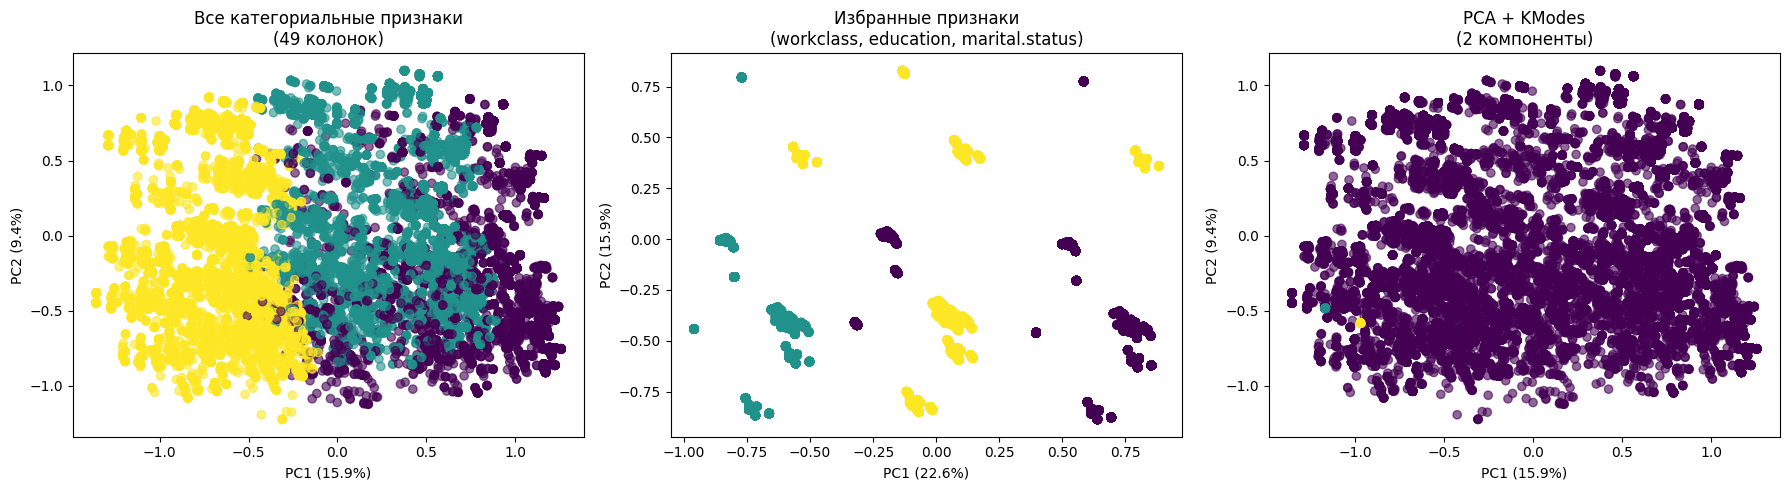

In [ ]:
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(18, 5))

# 1. Все категориальные признаки (One-Hot)
X_cat_all = data_cat_encoded.copy()

kmodes_all = KModes(n_clusters=3, init='Huang', random_state=42)
clusters_all = kmodes_all.fit_predict(X_cat_all)

pca_all = PCA(n_components=2)
X_pca_all = pca_all.fit_transform(X_cat_all)

plt.subplot(1, 3, 1)
plt.scatter(X_pca_all[:, 0], X_pca_all[:, 1], c=clusters_all, cmap='viridis', alpha=0.6)
plt.title('Все категориальные признаки\n({} колонок)'.format(X_cat_all.shape[1]))
plt.xlabel(f'PC1 ({pca_all.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca_all.explained_variance_ratio_[1]:.1%})')

print('[Все категориальные признаки]')
print(f"Итерации: {kmodes_all.n_iter_}\n")

# 2. Избранные категориальные признаки
selected_cat_features = ['workclass', 'education', 'marital.status']
encoder_sel = OneHotEncoder(sparse_output=False, drop='first')
X_cat_sel = encoder_sel.fit_transform(data_clean[selected_cat_features])

kmodes_sel = KModes(n_clusters=3, init='Huang', random_state=42)
clusters_sel = kmodes_sel.fit_predict(X_cat_sel)

pca_sel = PCA(n_components=2)
X_pca_sel = pca_sel.fit_transform(X_cat_sel)

plt.subplot(1, 3, 2)
plt.scatter(X_pca_sel[:, 0], X_pca_sel[:, 1], c=clusters_sel, cmap='viridis', alpha=0.6)
plt.title('Избранные признаки\n({})'.format(', '.join(selected_cat_features)))
plt.xlabel(f'PC1 ({pca_sel.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca_sel.explained_variance_ratio_[1]:.1%})')

print('[Избранные категориальные признаки]')
print(f"Итерации: {kmodes_sel.n_iter_}\n")

# 3. PCA + кластеризация (2 компоненты)
pca_cat = PCA(n_components=2)
X_pca_cat = pca_cat.fit_transform(data_cat_encoded)

kmodes_pca = KModes(n_clusters=3, init='Huang', random_state=42)
clusters_pca = kmodes_pca.fit_predict(X_pca_cat)

plt.subplot(1, 3, 3)
plt.scatter(X_pca_cat[:, 0], X_pca_cat[:, 1], c=clusters_pca, cmap='viridis', alpha=0.6)
plt.title('PCA + KModes\n(2 компоненты)')
plt.xlabel(f'PC1 ({pca_cat.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca_cat.explained_variance_ratio_[1]:.1%})')


print('[PCA-компоненты]')
print(f"Итерации: {kmodes_pca.n_iter_}")

plt.tight_layout()
plt.show()

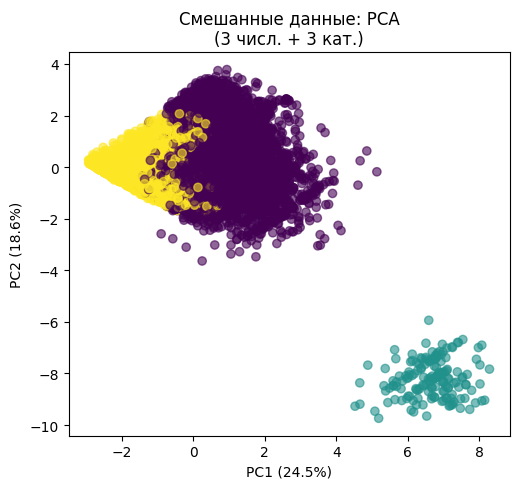

Silhouette: 0.151
Davies-Bouldin: 1.427


In [23]:
plt.figure(figsize=(15, 5))

numeric_features = ['age', 'capital.gain', 'hours.per.week']
categorical_features = ['marital.status', 'occupation', 'education']


mixed_processor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
])
X_mixed = mixed_processor.fit_transform(data_clean)

agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(X_mixed)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_mixed)

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1],
           c=clusters, cmap='viridis', alpha=0.6)
plt.title('Смешанные данные: PCA\n(3 числ. + 3 кат.)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')

plt.tight_layout()
plt.show()

print(f"Silhouette: {silhouette_score(X_mixed, clusters):.3f}")
print(f"Davies-Bouldin: {davies_bouldin_score(X_mixed, clusters):.3f}")